In [1]:
# 앞절에서 수행한 내용들

import os
import numpy as np
from sklearn.datasets import fetch_openml

dataset_root = os.path.join(os.getcwd(), 'datasets')
if not os.path.isdir(dataset_root):
    os.mkdir(dataset_root)
    
mnist = fetch_openml('mnist_784', version=1, data_home=dataset_root)
X, y = mnist["data"], mnist["target"].astype(np.uint8)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

# Multioutput Classification

**multioutput-multiclass classification(multioutput classification)**은 multilable classification에서 각 label이 multiclass를 갖는 경우를 말한다.

노이즈가 낀 숫자 이미지를 입력으로 받아 노이즈가 없는 숫자 이미지를 출력하는 것은 각 pixel별 label이 multilabel이고, 각 label은 0~255의 여러 값을 가지므로 multioutput classification system이라고 할 수 있다.

먼저, MNIST 이미지에 noise를 추가해 training과 test set을 만들자.

In [2]:
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise

# target은 원본 MNIST 이미지가 됨
y_train_mod = X_train
y_test_mod = X_test

이제 학습시켜보자.

In [3]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[10]])

결과를 확인해보자.

In [4]:
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = plt.cm.binary, **options)
    plt.axis("off")

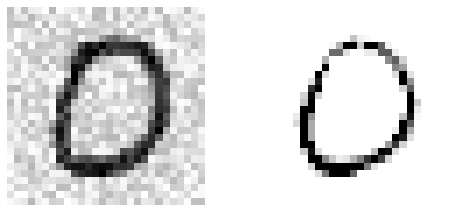

In [5]:
plt.figure(figsize=(8, 8))
plt.subplot(221); plot_digits([X_test_mod[10]], images_per_row=2)
plt.subplot(222); plot_digits(clean_digit, images_per_row=2)